In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Data Mining Assignment 2_NN
Student Details
Student Name and ID of the member submitting the assignment:
    Pratik Chavan 1001963580
    
Student Name and ID of the remaining members:

    Harshini kandimalla 1001960046
    Pratik Paterkar 1001937948
    
Notes: When submitting, fill your name and ID in this cell. Note that this is a markdown cell!
Do not make any changes in the dataset file and do not rename the 'database.csv'.
Rename your submission file to 'yourLastName_Last4digitsofyourID_PA1.ipynb' .
Do not to forget to cite any external sources used by you. 10 points per question will be deducted incase you fail to do so
DO NOT DELETE THIS CELL

Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn¶

# Importing the dataset

In [2]:
dataset =pd.read_csv('pima-indians-diabetes.csv') 
dataset.head(10) 

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Preprocessing

In [3]:
# Cleaning the dataset since there are 0 values in dataset which will create erroes in prediction.
# Here NaNs are treated as missing values: disregarded in fit, and maintained in transform
zero_values_colummns=['Pres','mass','Plas','skin'] 
for column in zero_values_colummns:
    dataset[column]=dataset[column].replace(0,np.NaN)
    mean=int(dataset[column].mean(skipna=True))
    dataset[column]=dataset[column].replace(np.NaN,mean)

# Checking null values in dataset after preprocessing.
dataset.isnull().values.any()

False

In [4]:
dataset.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.682292,72.386719,29.108073,79.799479,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.435999,12.096642,8.791221,115.244002,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Selecting the 3 best features using selectKBest algorithm

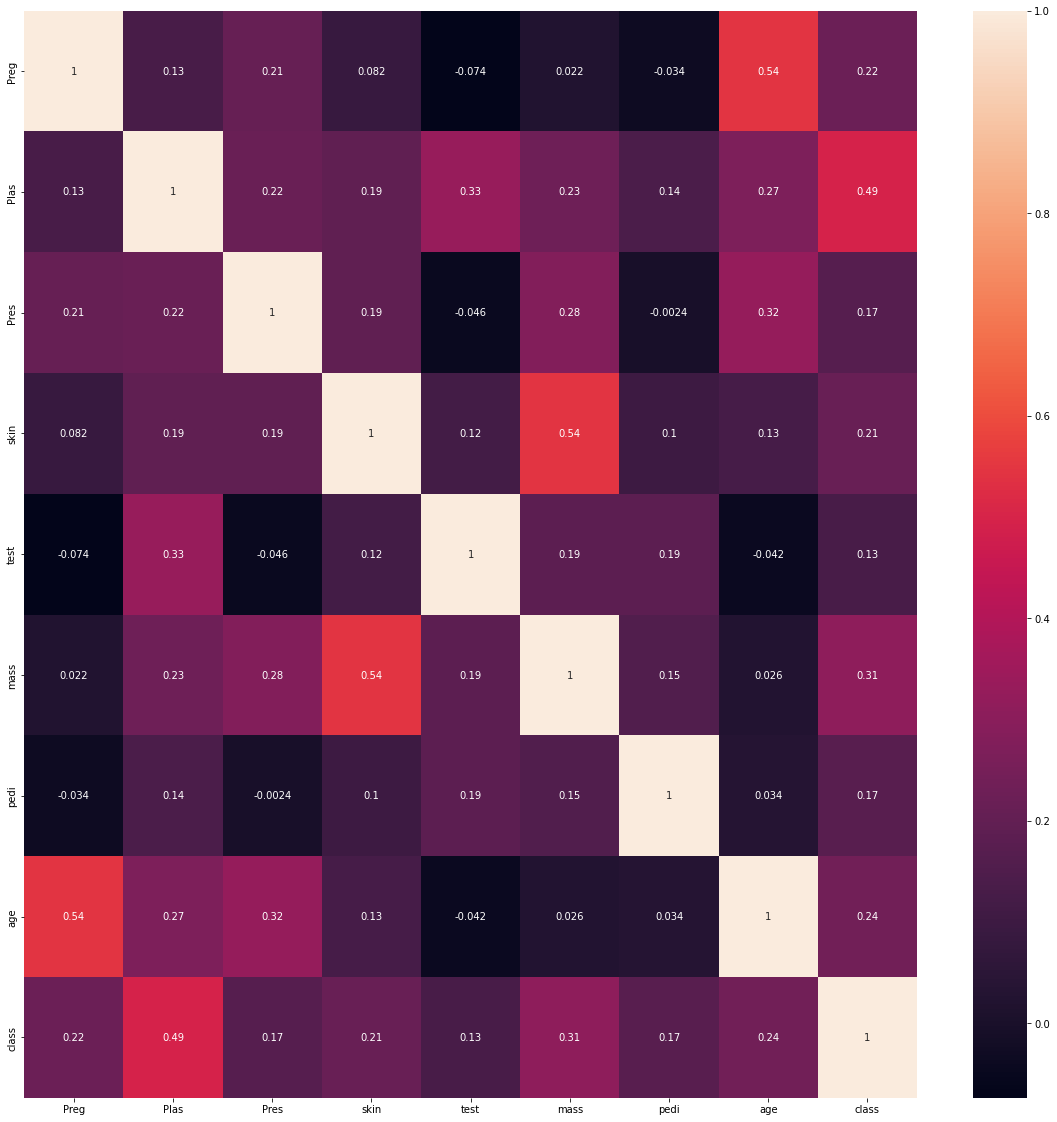

In [5]:
#plotting the graph to get the correlation between the columns identify which can be used to predict the relations.
import seaborn as sns
import matplotlib.pyplot as plt1

corrmatt = dataset.corr()
top_corr_features = corrmatt.index
plt1.figure(figsize=(20,20))

g = sns.heatmap(dataset[top_corr_features].corr(),annot=True)

# As we can see above we have maximum correlation between test,plas and age column.

# Selecting the best 3 features

In [6]:
# Used SelectKBest to selects the features according to the k highest score
# Using this we will get the 3 best features based on scores

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#getting all the columns except the target column into y
X=dataset.iloc[:,0:8] 

#getting the target column into x variable
y=dataset.iloc[:,8]  

#Used selectKBest model and chi2 method as scoring function
#k=3 since we have to select 3 best features.
select = SelectKBest(score_func=chi2, k=3)

#we have used fit and transform method on training x and y data
z = select.fit(X,y)


dataset_scores = pd.DataFrame(z.scores_)
dataset_columns = pd.DataFrame(X.columns)

f_Scores = pd.concat([dataset_columns,dataset_scores],axis=1)
f_Scores.columns = ['Columns','Score'] 
f_Scores 

#selecting the top 3 columns with highest score.
print(f_Scores.nlargest(3,'Score'))

  Columns        Score
4    test  2175.565273
1    Plas  1418.666546
7     age   181.303689


# splitting the data set into 60% for training set, 20% for Validation set and 20% for testing with random state 2022.

In [7]:
#Selecting the columns that have the highest score from the previous task.
X=dataset[['test','Plas','age']]
y=dataset.iloc[:,8]

#testing and training split based on random state 2022
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2022,test_size=0.4,stratify=y,shuffle=True)  
X_test,X_val,y_test,y_val=train_test_split(X_test,y_test,test_size=0.5,random_state=2022,stratify=y_test,shuffle=True) #training and validation split

In [8]:
print(len(X_train))
print(len(y_test))
print(len(y_val))

460
154
154


# Data normalization.

In [9]:
#dataset has values with differing scales
#to make the data unitless with mean 0 and variance 1 we have used StandardScalar.
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)
X_val=sc_X.fit_transform(X_val)

C:\Users\asus\anaconda3\envs\Data_Mining\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\asus\anaconda3\envs\Data_Mining\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

C:\Users\asus\anaconda3\envs\Data_Mining\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\asus\anaconda3\envs\Data_Mining\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

C:\Users\asus\anaconda3\envs\Data_Mining\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\asus\anaconda3\envs\Data_Mining\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

C:\Users\asus\anaconda3\envs\Data_Mining\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\asus\anaconda3\envs\Data_Mining\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

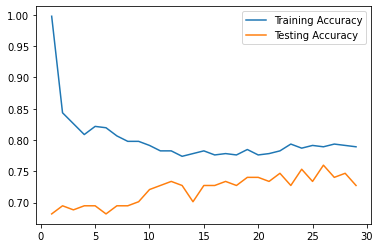

In [10]:
#declaring 2 variables to append the accuracy list.
training_accuracy=[]
test_accuracy=[]

#selecting the neighbour range from 1 to 30
#selecting more neighbours dosent affect the k value so 1 to 30 is more than enough.
neighbors=range(1,30)

#looping neighbors for every values inbetween 1- 30 to get the optimal k value to imrove the model.
for n in neighbors:
    neigh= KNeighborsClassifier(n_neighbors=n,metric='minkowski') #using metric as minkowski 
    neigh.fit(X_train,y_train)
    training_accuracy.append(neigh.score(X_train,y_train))
    test_accuracy.append(neigh.score(X_test,y_test))

import matplotlib.pyplot as plt1
#plotting the training vs testing accuracy
plt1.plot(neighbors,training_accuracy,label='Training Accuracy')
plt1.plot(neighbors,test_accuracy,label='Test Accuracy')
plt1.legend(['Training Accuracy','Testing Accuracy'])


# As you can see we got N=27 as the optimal k value.

# Confusion matrix for N =27 which is the optimal K value.

accuracy_score: 0.7402597402597403
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       101
           1       0.65      0.53      0.58        53

    accuracy                           0.74       154
   macro avg       0.71      0.69      0.70       154
weighted avg       0.73      0.74      0.73       154



C:\Users\asus\anaconda3\envs\Data_Mining\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


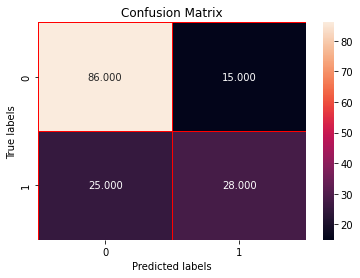

In [14]:
#predicting and creating a confustion matrix for test dataset where n_neighbors =27

neigh=KNeighborsClassifier(n_neighbors=27,metric='minkowski')
neigh.fit(X_train,y_train)

prediction_y=neigh.predict(X_test)

cmatrix=confusion_matrix(y_test,prediction_y)

print("accuracy_score:",accuracy_score(y_test,prediction_y))
print(classification_report(y_test,prediction_y,target_names=['0','1']))

ax= plt1.subplot()
sns.heatmap(cmatrix, annot=True,linewidth=0.5,linecolor='red', fmt='.3f', ax=ax);  

# cm visulization for 27 neighbours
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1']);

# [1] Confusion Matrix for 21 neighbours

accuracy_score: 0.7337662337662337
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       101
           1       0.62      0.57      0.59        53

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.73      0.73      0.73       154



C:\Users\asus\anaconda3\envs\Data_Mining\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


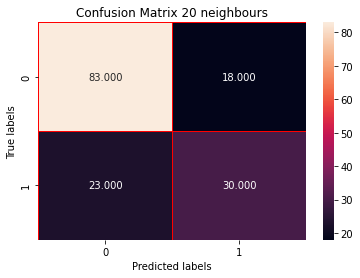

In [24]:
classifier1=KNeighborsClassifier(n_neighbors=21,metric='minkowski')
classifier1.fit(X_train,y_train)
prediction_y1=classifier1.predict(X_test)
cmatrix1=confusion_matrix(y_test,prediction_y1)

print("accuracy_score:",accuracy_score(y_test,prediction_y1))
print(classification_report(y_test,prediction_y1,target_names=['0','1']))
ax= plt1.subplot()

sns.heatmap(cmatrix1, annot=True,linewidth=0.5,linecolor='red', fmt='.3f', ax=ax);  

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix 20 neighbours'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

# [2] Confusion Matrix for 14 neighbours

accuracy_score: 0.7012987012987013
              precision    recall  f1-score   support

           0       0.74      0.84      0.79       101
           1       0.59      0.43      0.50        53

    accuracy                           0.70       154
   macro avg       0.66      0.64      0.64       154
weighted avg       0.69      0.70      0.69       154



C:\Users\asus\anaconda3\envs\Data_Mining\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


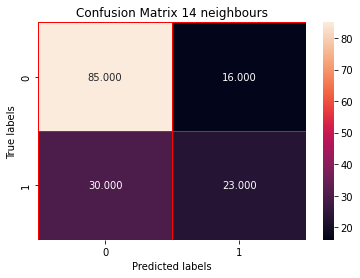

In [19]:
classifier2=KNeighborsClassifier(n_neighbors=14,metric='minkowski')
classifier2.fit(X_train,y_train)
prediction_y2=classifier2.predict(X_test)
cmatrix2=confusion_matrix(y_test,prediction_y2)

print("accuracy_score:",accuracy_score(y_test,prediction_y2))
print(classification_report(y_test,prediction_y2,target_names=['0','1'])) 
ax= plt1.subplot()

sns.heatmap(cmatrix2, annot=True,linewidth=0.5,linecolor='red', fmt='.3f', ax=ax);  

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix 14 neighbours'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);


# [3] Confusion Matrix for 7 neighbours

C:\Users\asus\anaconda3\envs\Data_Mining\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


accuracy_score: 0.6948051948051948
              precision    recall  f1-score   support

           0       0.76      0.77      0.77       101
           1       0.56      0.55      0.55        53

    accuracy                           0.69       154
   macro avg       0.66      0.66      0.66       154
weighted avg       0.69      0.69      0.69       154



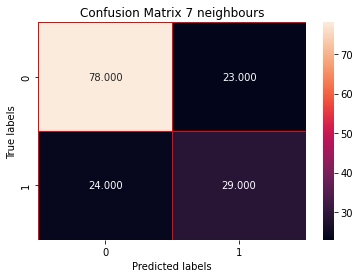

In [20]:
classifier3=KNeighborsClassifier(n_neighbors=7,metric='minkowski')
classifier3.fit(X_train,y_train)
prediction_y3=classifier3.predict(X_test)
cmatrix3=confusion_matrix(y_test,prediction_y3)

print("accuracy_score:",accuracy_score(y_test,prediction_y3))
print(classification_report(y_test,prediction_y3,target_names=['0','1'])) 
ax= plt1.subplot()

sns.heatmap(cmatrix3, annot=True,linewidth=0.5,linecolor='red', fmt='.3f', ax=ax);  

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix 7 neighbours'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

In [ ]:
#References
[1] https://medium.com/@alexstrebeck/training-and-testing-machine-learning-models-e1f27dc9b3cb
[2] https://www.datatechnotes 2.com/2021/02/seleckbest-feature-selection-example-in-python.html
[3] https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/
[4] https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb
[5] https://www.ibm.com/topics/knn
[6] https://ai.plainenglish.io/understanding-confusion-matrix-and-applying-it-on-knn-classifier-on-iris-dataset-b57f85d05cd8